In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix
import joblib

## Preprocessing

In [2]:
%run preprocess.py

Loading images from: dataset/0anger/
30 images are downloaded
Loading images from: dataset/1fear/
66 images are downloaded
Loading images from: dataset/2happiness/
93 images are downloaded
Loading images from: dataset/3sadness/
124 images are downloaded
Loading images from: dataset/4surprise/
154 images are downloaded
Loading images from: dataset/5neutral/
184 images are downloaded
Total # of images: 184
VGG16 emotion classification results:
[[ 0  0  0 13  0 17]
 [ 0  8  3 12  9  4]
 [ 0  0 20  0  0  7]
 [ 0  0  1 22  3  5]
 [ 0  0  2  1 25  2]
 [ 0  0  0  2  6 22]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        30
           1     1.0000    0.2222    0.3636        36
           2     0.7692    0.7407    0.7547        27
           3     0.4400    0.7097    0.5432        31
           4     0.5814    0.8333    0.6849        30
           5     0.3860    0.7333    0.5057        30

    accuracy                         0.5272    

/home/coco/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/coco/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/coco/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30 images are downloaded
Loading images from: dataset/0anger/
30 images are downloaded
Loading images from: dataset/1fear/
36 images are downloaded
Loading images from: dataset/3sadness/
31 images are downloaded
Total # of images: 184
CNN3D emotion classification results:
[[127   0   0]
 [ 27   0   0]
 [ 30   0   0]]
              precision    recall  f1-score   support

           0     0.6902    1.0000    0.8167       127
           1     0.0000    0.0000    0.0000        27
           2     0.0000    0.0000    0.0000        30

    accuracy                         0.6902       184
   macro avg     0.2301    0.3333    0.2722       184
weighted avg     0.4764    0.6902    0.5637       184



/home/coco/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/coco/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/coco/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fine-tuned CNN3D emotion classification results:
[[ 5  0 42 50]
 [ 0  0 11 16]
 [ 4  0 14 12]
 [ 0  0 16 14]]
              precision    recall  f1-score   support

           0     0.5556    0.0515    0.0943        97
           1     0.0000    0.0000    0.0000        27
           2     0.1687    0.4667    0.2478        30
           3     0.1522    0.4667    0.2295        30

    accuracy                         0.1793       184
   macro avg     0.2191    0.2462    0.1429       184
weighted avg     0.3452    0.1793    0.1276       184



/home/coco/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/coco/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/coco/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Data loading

#### Result from VGG16. Probablity distribution among 6 emotions

In [3]:
vgg = np.load('results/vgg_predictions.npy')

#### Result from 3D CNN with SMIC microexpression dataset. Probablity distribution among 3 emotions: positive, negative, surprised

In [7]:
cnn3d = np.load('results/cnn3d_predictions.npy')

#### ActionUnits: occurance of 11 action units. Obtained via https://github.com/TadasBaltrusaitis/OpenFace

In [10]:
au = np.load("results/AU_predictions.npy")

#### Result from 3D CNN fine-tuned with CK+. Probablity distribution among 4 emotions: positive, negative, surprised, neutral

In [11]:
cnn3d_ft = np.load("results/cnn3d_ft_predictions.npy")

#### Data labels

In [12]:
y = np.load("results/labels.npy")

#### Result from VGG11 facial features

nf = np.load("results/vgg11_feat.npy")

In [19]:
vgg = pd.DataFrame(data=vgg)
cnn3d = pd.DataFrame(data=cnn3d)
au = pd.DataFrame(data=au)
cnn3d_ft = pd.DataFrame(data=cnn3d_ft)
#nf = pd.DataFrame(data=nf)

d=[vgg, cnn3d, cnn3d_ft, au
  #, nf
  ]
df = pd.concat(d, axis=1)
y_ = {'Class':y}
dy = pd.DataFrame(data=y_)

#### Splitting data to train and test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, dy, test_size = 0.15, random_state=50, stratify=dy)
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

#### Training and testing MLP

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2000)  
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2000)

In [25]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions, digits=4))

[[4 0 0 1 0 0]
 [0 3 0 0 2 0]
 [0 0 4 0 0 0]
 [1 1 0 3 0 0]
 [0 1 0 0 3 0]
 [1 0 0 0 0 4]]
              precision    recall  f1-score   support

           0     0.6667    0.8000    0.7273         5
           1     0.6000    0.6000    0.6000         5
           2     1.0000    1.0000    1.0000         4
           3     0.7500    0.6000    0.6667         5
           4     0.6000    0.7500    0.6667         4
           5     1.0000    0.8000    0.8889         5

    accuracy                         0.7500        28
   macro avg     0.7694    0.7583    0.7582        28
weighted avg     0.7673    0.7500    0.7529        28



#### Save model

In [27]:
joblib.dump(mlp, 'results/mlp.pkl') 

['results/mlp.pkl']

#### Plot loss

In [28]:
loss = mlp.loss_curve_

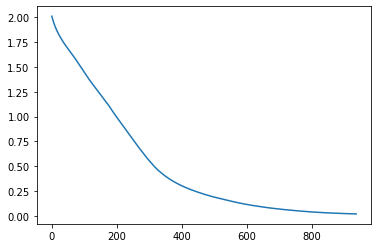

In [29]:
import matplotlib.pyplot as plt
plt.plot(loss)

#### Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score
mlp2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2000)  
scores = cross_val_score(mlp2, df, y, cv=10)
print(scores)
print("Mean: " + str(scores.mean()))

[0.52631579 0.73684211 0.68421053 0.57894737 0.66666667 0.5
 0.5        0.88888889 0.16666667 0.72222222]
Mean: 0.5970760233918129
